In [20]:
import pandas as pd
import os
from tqdm.notebook import tqdm 
from malnis import show
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
import seaborn as sns
sns.set(style = "whitegrid")

In [21]:
specter_folder = "/home/jarobyte/scratch/malnis_dataset/mlp_pytorch/specter/train_logs/"
specter_files = sorted(os.listdir(specter_folder))
specter_files

['14628590_1.pkl',
 '14628590_2.pkl',
 '14628725_1.pkl',
 '14628725_10.pkl',
 '14628725_11.pkl',
 '14628725_12.pkl',
 '14628725_2.pkl',
 '14628725_3.pkl',
 '14628725_4.pkl',
 '14628725_5.pkl',
 '14628725_6.pkl',
 '14628725_7.pkl',
 '14628725_8.pkl',
 '14628725_9.pkl',
 '14678619_1.pkl',
 '14678619_12.pkl',
 '14678619_2.pkl',
 '14678619_3.pkl',
 '14678619_4.pkl',
 'test.pkl']

In [22]:
specter_data = pd.concat([pd.read_pickle(specter_folder + x).assign(name = x) for x in tqdm(specter_files)])
show(specter_data)

  0%|          | 0/20 [00:00<?, ?it/s]

(34030, 11)


,epoch,total_epochs,train_loss,hidden_size,num_layers,weight_decay,embeddings,dev_average_precision,dev_roc_auc,training_minutes,name
0,1,10,0.162146,100,2,0.0,specter,0.067066,0.678012,0.180118,14628590_1.pkl
1,2,10,0.086673,100,2,0.0,specter,0.067066,0.678012,0.180118,14628590_1.pkl
2,3,10,0.085053,100,2,0.0,specter,0.067066,0.678012,0.180118,14628590_1.pkl
3,4,10,0.084981,100,2,0.0,specter,0.067066,0.678012,0.180118,14628590_1.pkl
4,5,10,0.084104,100,2,0.0,specter,0.067066,0.678012,0.180118,14628590_1.pkl


In [23]:
sbert_folder = "/home/jarobyte/scratch/malnis_dataset/mlp_pytorch/sbert/train_logs/"
sbert_files = sorted(os.listdir(sbert_folder))
sbert_files

['14628553_1.pkl',
 '14628553_2.pkl',
 '14628727_1.pkl',
 '14628727_10.pkl',
 '14628727_11.pkl',
 '14628727_12.pkl',
 '14628727_2.pkl',
 '14628727_3.pkl',
 '14628727_4.pkl',
 '14628727_5.pkl',
 '14628727_6.pkl',
 '14628727_7.pkl',
 '14628727_8.pkl',
 '14628727_9.pkl',
 '14678616_1.pkl',
 '14678616_10.pkl',
 '14678616_11.pkl',
 '14678616_2.pkl',
 '14678616_3.pkl',
 '14678616_4.pkl',
 '14678616_5.pkl',
 '14678616_6.pkl',
 '14678616_7.pkl',
 '14678616_8.pkl',
 '14678616_9.pkl',
 'test.pkl']

In [24]:
sbert_data = pd.concat([pd.read_pickle(sbert_folder + x).assign(name = x) for x in tqdm(sbert_files)])
show(sbert_data)

  0%|          | 0/26 [00:00<?, ?it/s]

(46030, 11)


,epoch,total_epochs,train_loss,hidden_size,num_layers,weight_decay,embeddings,dev_average_precision,dev_roc_auc,training_minutes,name
0,1,10,0.165688,100,2,0.0,sbert,0.062419,0.66415,0.189423,14628553_1.pkl
1,2,10,0.084309,100,2,0.0,sbert,0.062419,0.66415,0.189423,14628553_1.pkl
2,3,10,0.083853,100,2,0.0,sbert,0.062419,0.66415,0.189423,14628553_1.pkl
3,4,10,0.083713,100,2,0.0,sbert,0.062419,0.66415,0.189423,14628553_1.pkl
4,5,10,0.083626,100,2,0.0,sbert,0.062419,0.66415,0.189423,14628553_1.pkl


In [25]:
data = pd.concat([specter_data, sbert_data])
show(data)

(80060, 11)


,epoch,total_epochs,train_loss,hidden_size,num_layers,weight_decay,embeddings,dev_average_precision,dev_roc_auc,training_minutes,name
0,1,10,0.162146,100,2,0.0,specter,0.067066,0.678012,0.180118,14628590_1.pkl
1,2,10,0.086673,100,2,0.0,specter,0.067066,0.678012,0.180118,14628590_1.pkl
2,3,10,0.085053,100,2,0.0,specter,0.067066,0.678012,0.180118,14628590_1.pkl
3,4,10,0.084981,100,2,0.0,specter,0.067066,0.678012,0.180118,14628590_1.pkl
4,5,10,0.084104,100,2,0.0,specter,0.067066,0.678012,0.180118,14628590_1.pkl


# basic stats

In [26]:
data.total_epochs.max()

2000

In [27]:
# max training hours

data.groupby("embeddings").training_minutes.max() / 60

embeddings
sbert      1.44213
specter    1.52742
Name: training_minutes, dtype: float64

In [28]:
data.groupby("name").embeddings.min().value_counts()

sbert      26
specter    19
Name: embeddings, dtype: int64

In [29]:
data.groupby("name").weight_decay.min().value_counts()

0.00000    21
0.00100     7
0.01000     7
0.00010     5
0.00001     5
Name: weight_decay, dtype: int64

In [30]:
data.groupby("name").min().groupby(["weight_decay", "embeddings"]).size().unstack()

embeddings,sbert,specter
weight_decay,,
0.00000,14,7
0.00001,3,2
0.00010,3,2
0.00100,3,4
0.01000,3,4


In [31]:
# best training loss

data.groupby("name").train_loss.min().sort_values().head()

name
14678619_3.pkl     0.081189
14678619_4.pkl     0.081198
14678619_1.pkl     0.081201
14678619_2.pkl     0.081206
14678619_12.pkl    0.081216
Name: train_loss, dtype: float64

In [32]:
# best roc auc

data.groupby("name").dev_roc_auc.mean().sort_values(ascending = False).head()

name
14678619_4.pkl     0.697064
14678619_1.pkl     0.696870
14678619_12.pkl    0.696555
14678619_3.pkl     0.696354
14628725_6.pkl     0.696347
Name: dev_roc_auc, dtype: float64

In [33]:
# best average precision

data.groupby("name").dev_average_precision.max().sort_values(ascending = False).head()

name
14678619_2.pkl    0.074113
14678619_4.pkl    0.074068
14678619_3.pkl    0.074031
14628725_7.pkl    0.073972
14678619_1.pkl    0.073900
Name: dev_average_precision, dtype: float64

In [34]:
# best models by category

data.groupby("name").min()[["embeddings", "train_loss", "dev_average_precision", "dev_roc_auc"]]\
.sort_values(["embeddings", "dev_average_precision"], ascending = False)\
.groupby("embeddings").head(3)

,embeddings,train_loss,dev_average_precision,dev_roc_auc
name,,,,
14678619_2.pkl,specter,0.081206,0.074113,0.696183
14678619_4.pkl,specter,0.081198,0.074068,0.697064
14678619_3.pkl,specter,0.081189,0.074031,0.696354
14628727_2.pkl,sbert,0.083117,0.062769,0.666437
14628727_1.pkl,sbert,0.083107,0.062742,0.667328
14628727_11.pkl,sbert,0.083139,0.062677,0.666630


# the effect of weight decay

In [35]:
data.groupby("weight_decay").train_loss.min()

weight_decay
0.00000    0.081189
0.00001    0.081244
0.00010    0.081317
0.00100    0.081880
0.01000    0.088616
Name: train_loss, dtype: float64

In [36]:
data.groupby("weight_decay").dev_roc_auc.max()

weight_decay
0.00000    0.697064
0.00001    0.696168
0.00010    0.696347
0.00100    0.693272
0.01000    0.660856
Name: dev_roc_auc, dtype: float64

In [37]:
data.groupby("weight_decay").dev_average_precision.max()

weight_decay
0.00000    0.074113
0.00001    0.073972
0.00010    0.073724
0.00100    0.072425
0.01000    0.060238
Name: dev_average_precision, dtype: float64

# embeddings

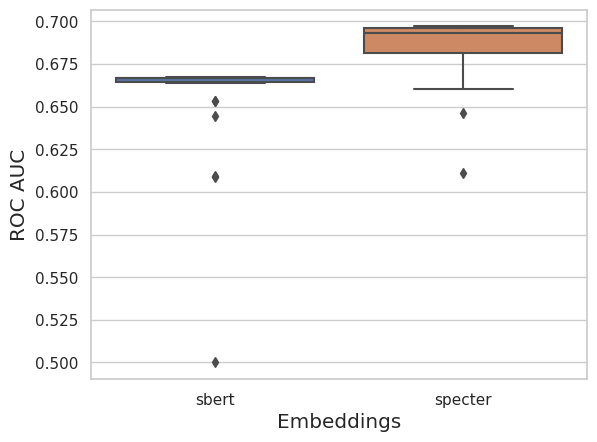

In [38]:
sns.boxplot(
    data = data.groupby("name")[["dev_roc_auc", "embeddings"]].min(),
    x = "embeddings", 
    y = "dev_roc_auc"
)
# plt.ylim(0)
plt.xlabel("Embeddings", fontsize = "large")
plt.ylabel("ROC AUC", fontsize = "large")
plt.show()

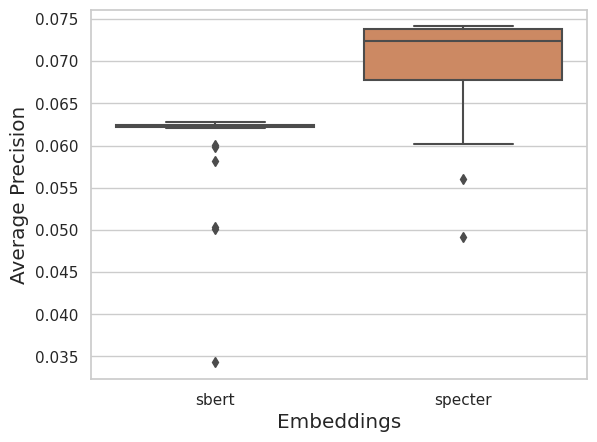

In [39]:
sns.boxplot(
    data = data.groupby("name")[["dev_average_precision", "embeddings"]].min(),
    x = "embeddings", 
    y = "dev_average_precision"
)
# plt.ylim(0)
plt.xlabel("Embeddings", fontsize = "large")
plt.ylabel("Average Precision", fontsize = "large")
plt.show()

In [40]:
data.groupby("name")[["embeddings", "dev_average_precision"]].max()\
.groupby("embeddings").dev_average_precision.describe().T

embeddings,sbert,specter
count,25.000000,20.000000
mean,0.059957,0.069049
std,0.006354,0.007162
min,0.034286,0.049176
25%,0.062133,0.067005
50%,0.062318,0.072358
75%,0.062461,0.073853
max,0.062769,0.074113


# metrics

In [41]:
data.groupby(["hidden_size", "num_layers"])\
.train_loss\
.min().unstack()\
.style.background_gradient(axis = None)

num_layers,1,2,3,4
hidden_size,,,,
100,0.083018,0.082935,0.088870,0.083107
150,0.083034,nan,0.081189,0.083018
200,0.083024,0.088616,0.083044,nan
250,0.082124,nan,0.094317,0.081198
300,0.083026,nan,0.083117,nan
350,nan,0.088616,0.081880,0.081317
400,0.081244,0.093593,nan,0.081201
450,0.081429,0.081216,nan,0.081206
500,0.082224,0.093593,0.081248,0.083023


In [42]:
data.groupby(["hidden_size", "num_layers"])\
.dev_roc_auc\
.max().unstack().round(4)\
.style.background_gradient(axis = None)

num_layers,1,2,3,4
hidden_size,,,,
100,0.667200,0.684900,0.646100,0.667300
150,0.667400,nan,0.696400,0.667400
200,0.667000,0.660200,0.667300,nan
250,0.692500,nan,0.500000,0.697100
300,0.666700,nan,0.666400,nan
350,nan,0.660900,0.693300,0.696300
400,0.696200,0.609100,nan,0.696900
450,0.695400,0.696600,nan,0.696200
500,0.692900,0.608700,0.696200,0.666900


In [43]:
data.groupby(["hidden_size", "num_layers"])\
.dev_average_precision\
.max().unstack().round(4)\
.style.background_gradient(axis = None)

num_layers,1,2,3,4
hidden_size,,,,
100,0.062300,0.068400,0.056100,0.062700
150,0.062600,nan,0.074000,0.062400
200,0.062500,0.060200,0.062500,nan
250,0.072300,nan,0.034300,0.074100
300,0.062300,nan,0.062800,nan
350,nan,0.060200,0.072400,0.073200
400,0.073700,0.050400,nan,0.073900
450,0.073700,0.073800,nan,0.074100
500,0.071900,0.050100,0.074000,0.062400


In [44]:
data.groupby(["hidden_size", "num_layers"])\
.training_minutes\
.max().unstack().round(4)\
.style.background_gradient(axis = None)

num_layers,1,2,3,4
hidden_size,,,,
100,28.610300,37.030500,43.558400,50.053200
150,32.157600,nan,40.623600,47.437200
200,32.312800,37.037400,43.933900,nan
250,29.946500,nan,43.772700,50.388000
300,29.632500,nan,45.087600,nan
350,nan,47.810500,57.881200,69.333400
400,42.589500,43.905900,nan,75.096400
450,51.329100,63.287600,nan,91.645200
500,51.803000,55.152800,83.051300,86.527800


# queries

In [45]:
data.query("name == '14678619_2.pkl'")

,epoch,total_epochs,train_loss,hidden_size,num_layers,weight_decay,embeddings,dev_average_precision,dev_roc_auc,training_minutes,name
0,1,2000,0.101604,450,4,0.0,specter,0.074113,0.696183,91.645177,14678619_2.pkl
1,2,2000,0.084356,450,4,0.0,specter,0.074113,0.696183,91.645177,14678619_2.pkl
2,3,2000,0.084046,450,4,0.0,specter,0.074113,0.696183,91.645177,14678619_2.pkl
3,4,2000,0.083712,450,4,0.0,specter,0.074113,0.696183,91.645177,14678619_2.pkl
4,5,2000,0.083710,450,4,0.0,specter,0.074113,0.696183,91.645177,14678619_2.pkl
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,2000,0.081233,450,4,0.0,specter,0.074113,0.696183,91.645177,14678619_2.pkl
1996,1997,2000,0.081212,450,4,0.0,specter,0.074113,0.696183,91.645177,14678619_2.pkl
1997,1998,2000,0.081223,450,4,0.0,specter,0.074113,0.696183,91.645177,14678619_2.pkl
1998,1999,2000,0.081219,450,4,0.0,specter,0.074113,0.696183,91.645177,14678619_2.pkl


In [50]:
data.query("name == '14628727_2.pkl'")

,epoch,total_epochs,train_loss,hidden_size,num_layers,weight_decay,embeddings,dev_average_precision,dev_roc_auc,training_minutes,name
0,1,2000,0.106419,300,3,0.0001,sbert,0.062769,0.666437,45.087595,14628727_2.pkl
1,2,2000,0.084110,300,3,0.0001,sbert,0.062769,0.666437,45.087595,14628727_2.pkl
2,3,2000,0.083901,300,3,0.0001,sbert,0.062769,0.666437,45.087595,14628727_2.pkl
3,4,2000,0.083881,300,3,0.0001,sbert,0.062769,0.666437,45.087595,14628727_2.pkl
4,5,2000,0.083735,300,3,0.0001,sbert,0.062769,0.666437,45.087595,14628727_2.pkl
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,2000,0.083127,300,3,0.0001,sbert,0.062769,0.666437,45.087595,14628727_2.pkl
1996,1997,2000,0.083152,300,3,0.0001,sbert,0.062769,0.666437,45.087595,14628727_2.pkl
1997,1998,2000,0.083145,300,3,0.0001,sbert,0.062769,0.666437,45.087595,14628727_2.pkl
1998,1999,2000,0.083141,300,3,0.0001,sbert,0.062769,0.666437,45.087595,14628727_2.pkl
